# **IMPORTS**

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
import os

In [19]:
from tensorflow.keras import Sequential, datasets, Input
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Rescaling

In [5]:
from collections import Counter

```
⠀⠀⠀⠀⠀⠀⣀⣤⡤
⠀⠀⠀⠀⢀⣾⣿⠋
⠀⠀⠀⣠⣾⣿⡟
⠀⠀⢸⠛⠉⢹⠃⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⢀⡠⠄⠠⣀
⠀⠀⡘⠀⠀⠀⡀⠀⠀⠀⠀⠀⠀⠀⠀⣠⠖⠉⠀⠀⠀⣾⣿⣦⡀
⠀⠀⡇⠀⠀⠀⢡⠄⠀⠀⣀⣀⣀⣠⠊⠀⠀⠀⠀⡠⠞⠛⠛⠛⠛⡀
⠀⠀⢃⠀⠀⠀⠀⠗⠚⠉⠉⠀⠈⠁⠀⠀⠀⢀⡔⠁⠀
⠀⠀⠸⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⣴⣶⣄⠲⡎
⠀⠀⠀⠃⠀⠀⢠⣤⡀⠀⠀⠀⠀⣿⣿⣿⠀⠘⡄
⠀⠀⠀⡆⠀⠀⣿⣿⡇⠀⠀⠀⠀⠈⠛⠉⣴⣆⢹⡄
⠀⠀⠀⣇⢰⡧⣉⡉⠀⠀⢀⡀⠀⣀⣀⣠⣿⡷⢠⡇
⠀⠀⠀⢻⠘⠃⠈⠻⢦⠞⠋⠙⠺⠋⠉⠉⠉⢡⠟
⠀⠀⠀⠀⠳⢄⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⢠⠋⠀⠀
```

## **SETTINGS**
---

In [6]:
# Matplotlib inline to visualize Matplotlib graphs
%matplotlib inline

# Configuration to set so that all the Seaborn figures come out with this size
%config Inlinebackend.figure_format= 'retina'

In [7]:
# Set the Seaborn context to "poster" for larger text and figures
sns.set_context("poster")

# Set the default figure size for Seaborn plots
sns.set(rc={"figure.figsize": (12., 6.)})

# Set the Seaborn style to "whitegrid" for a white background with gridlines
sns.set_style("whitegrid")

In [8]:
# Set the max displayable columns to max
pd.set_option('display.max_columns', None)

In [9]:
# Activates XLA (for JIT compiler)
os.environ["TF_XLA_FLAGS"]= "--tf_xla_enable_xla_devices"

# Uses the right memory when using GPU
os.environ["TF_FORCE_GPU_ALLOW_GROWTH"]= "true"

---

# **DOCUMENTATION**

[The CIFAR-10 dataset](https://www.cs.toronto.edu/~kriz/cifar.html)

[Tensorflow cifar10](https://www.tensorflow.org/datasets/catalog/cifar10?hl=es)

[Convolutional Kernel Networks](https://arxiv.org/pdf/1406.3332v2)

[What is the class of this image?](https://rodrigob.github.io/are_we_there_yet/build/classification_datasets_results.html)

[(D) papers that only evaluate on cifar10](https://www.reddit.com/r/MachineLearning/comments/1bhp54a/d_papers_that_only_evaluate_on_cifar10)

[Image classification using CNN (CIFAR10 dataset)](https://www.youtube.com/watch?v=zadvMgHaTfA)

---

# **DATA**

In [10]:
data= datasets.cifar10.load_data()

## Task Description

In this project, students will first build a Convolutional Neural Network (CNN) model from scratch to classify images from a given dataset into predefined categories. Then, they will implement a transfer learning approach using a pre-trained model. Finally, students will compare the performance of the custom CNN and the transfer learning model based on evaluation metrics and analysis.

The dataset for this task is the CIFAR-10 dataset, which consists of 60,000 32x32 color images in 10 classes, with 6,000 images per class. You can download the dataset from [here](https://www.cs.toronto.edu/~kriz/cifar.html).

## Assessment Components

1.  **Data Preprocessing**
    
    *   Data loading and preprocessing (e.g., normalization, resizing, augmentation).
    *   Create visualizations of some images, and labels.
2.  **Model Architecture**
    
    *   Design a CNN architecture suitable for image classification.
    *   Include convolutional layers, pooling layers, and fully connected layers.
3.  **Model Training**
    
    *   Train the CNN model using appropriate optimization techniques (e.g., stochastic gradient descent, Adam).
    *   Utilize techniques such as early stopping to prevent overfitting.
4.  **Model Evaluation**
    
    *   Evaluate the trained model on a separate validation set.
    *   Compute and report metrics such as accuracy, precision, recall, and F1-score.
    *   Visualize the confusion matrix to understand model performance across different classes.
5.  **Transfer Learning**
    
    *   Perform transfer learning with your chosen pre-trained models i.e., you will probably try a few and choose the best one (e.g., VGG16, Inception, ResNet trained on ImageNet)  
        *   You may find this [link](https://www.tensorflow.org/tutorials/images/transfer_learning_with_hub) helpful.
        *   [This](https://pytorch.org/tutorials/beginner/transfer_learning_tutorial.html) is the Pytorch version.
    *   Train and evaluate the transfer learning model.
    *   Compare its performance against your custom CNN.
    *   Discuss advantages and trade-offs of using transfer learning over building a model from scratch.

---

# **1. DATA PREPROCESSING**
## Data loading

In [11]:
(X_train, y_train), (X_test, y_test)= data

In [12]:
print(f"Shape of X-train: {X_train.shape}\nShape of X-test: {X_test.shape}")
print(f"Shape of y-train: {y_train.shape}\nShape of y-test: {y_test.shape}")

Shape of X-train: (50000, 32, 32, 3)
Shape of X-test: (10000, 32, 32, 3)
Shape of y-train: (50000, 1)
Shape of y-test: (10000, 1)


The array (50000, 32, 32, 3) means: `50000` samples, `32x32` pixels and `3` channels `RBG`.

While the array (50000, 1) means: `50000` samples and `1` label (airplane, bird, deer, dog, etc,.)

This means for every `X_train[i]` item it has the `y_train[i]` label

| Label  | Description      |
| :----- | :--------- |
| 0      | airplane   |
| 1      | automobile |
| 2      | bird       |
| 3      | cat        |
| 4      | deer       |
| 5      | dog        |
| 6      | frog       |
| 7      | horse      |
| 8      | ship       |
| 9      | truck      |


In [13]:
class_names= [
  "airplane", "automobile", "bird", "cat",
  "deer", "dog", "frog", "horse", "ship", "truck"
]

C:\Users\Usuario\AppData\Local\Temp\ipykernel_32940\3158793262.py:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.title(class_names[int(y_train[idx])])


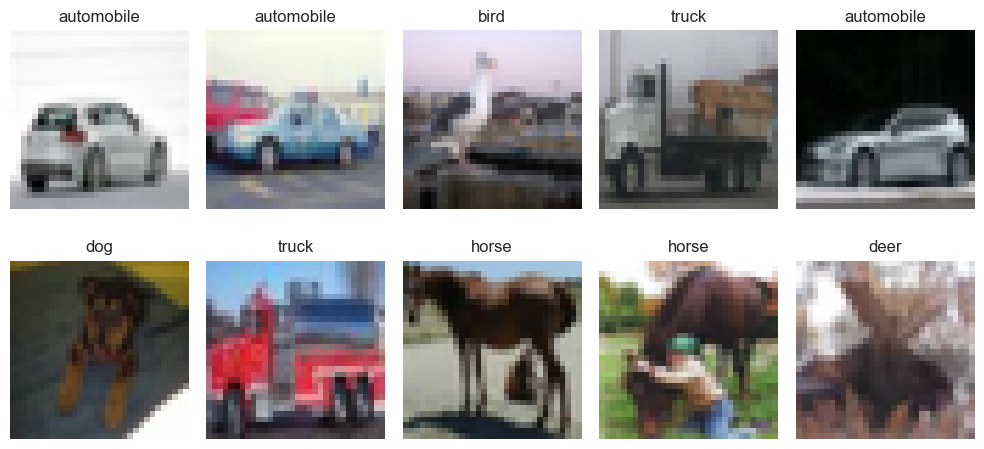

In [14]:
plt.figure(figsize=(10, 5))
# shows random 10 images from dataset
for i in range(10):
  idx= np.random.randint(len(X_train))
  plt.subplot(2, 5, i + 1)
  plt.imshow(X_train[idx])
  plt.title(class_names[int(y_train[idx])])
  plt.axis("off")

plt.tight_layout()
plt.show()

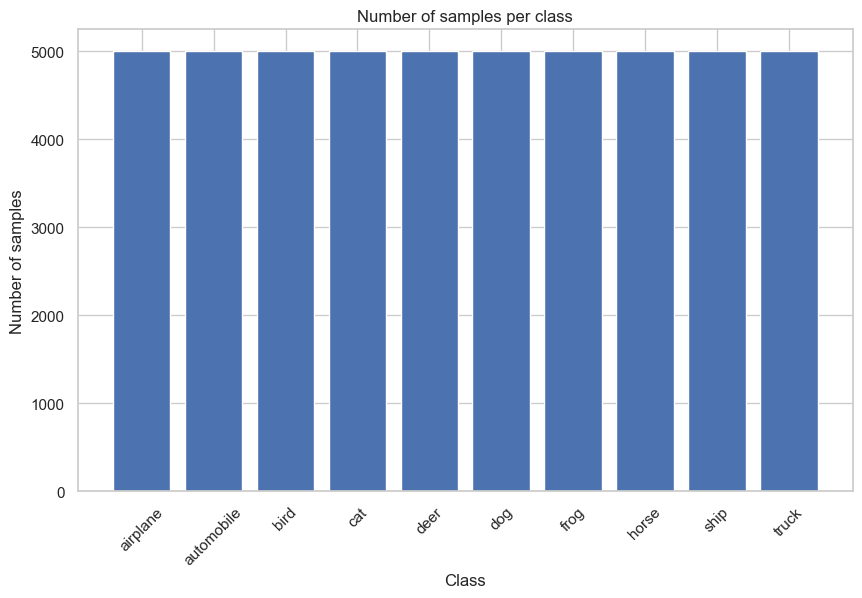

In [15]:
# Flat the labels
labels= y_train.flatten()

# Count the number of samples per class
class_counts= Counter(labels)

# Sort by class index
classes= sorted(class_counts.keys())
counts=  [class_counts[c] for c in classes]

# Plot
plt.figure(figsize=(10, 6))
plt.bar(class_names, counts)
plt.xlabel('Class')
plt.ylabel('Number of samples')
plt.title('Number of samples per class')
plt.xticks(rotation=45)
plt.show()

> 5000 samples per class.

---

## Data preprocessing

Before training, we need to prepare our data to fit the model:
1. **Reshape** the input images to add the channel dimension expected by CNNs.
2. **Normalize** pixel values to the [0, 1] range to speed up training.
3. **Encode** the labels using one-hot encoding for categorical classification.

We will use the `Rescaling` and `to_categorical` utilities provided by Keras.

In [16]:
# 1. Reshape to add channel dimension
#X_train= X_train.reshape(-1, 28, 28, 1)
#X_test=  X_test.reshape(-1, 28, 28, 1)
# We don't need to reshape the data because the imgs are already 32*32 on RGB

# 2. Create a preprocessing layer for normalization
normalization_layer= Rescaling(1./255)
X_train= normalization_layer(X_train)
X_test=  normalization_layer(X_test)

# 3. Convert labels to one-hot vectors
y_train_cat= to_categorical(y_train, num_classes=10)
y_test_cat=  to_categorical(y_test, num_classes=10)

Since CIFAR-10 images already have the shape **(32, 32, 3)**, we **don’t need to reshape** them — each image already includes the RGB channels expected by a CNN.

When applying `Rescaling(1./255)`, we **normalize pixel values** from the original range **[0, 255]** to **[0, 1]**.
This helps the model train faster and more stably, as it avoids large input values that can slow convergence or cause numerical instability.

Finally, we use **one-hot encoding (OHE)** with `to_categorical()` to convert numeric labels (0–9) into binary vectors like `[0, 0, 0, 1, 0, 0, 0, 0, 0, 0]`.
This representation allows the network to interpret the labels correctly when using **categorical cross-entropy** as the loss function.

---

# **2. MODEL ARCHITECTURE**
## CNN Architecture

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    # First convolutional layer with 32 filters, 3x3 kernel, ReLU activation
    # Input shape is 28x28 pixels with 1 color channel (grayscale)
    Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    # Max pooling layer to reduce spatial dimensions by a factor of 2
    MaxPooling2D(2,2),
    # Second convolutional layer with 64 filters, 3x3 kernel, ReLU activation
    Conv2D(64, (3,3), activation='relu'),
    # Another max pooling layer to reduce size further
    MaxPooling2D(2,2),
    # Flatten the 2D feature maps into a 1D vector for dense layers
    Flatten(),
    # Fully connected (dense) layer with 128 neurons and ReLU activation
    #Learns intermediate features from the previous layers
    Dense(128, activation='relu'),
    # Output layer with 10 neurons (for 10 classes) and softmax activation
    #Produces the final probabilities for each class.
    Dense(10, activation='softmax')
])

model.summary()


In [ ]:
# Model 1.

model= Sequential([
  # Input layer
  Input(shape=(32, 32, 3)),
  # Conv layer with 32 filters, 3x3 kernel, ReLU activation
  Conv2D(32, (3, 3), activation= "relu"),
  # Max pooling layer to reduce spatial dimensions by a factor of 2
  MaxPooling2D(2, 2),
  # Conv layer with 64 filters, exe kernel, ReLU activation
  Conv2D(64, (3, 3), activation= "relu"),
  # Another max pooling to reduce size further
  MaxPooling2D(2, 2),
  # Flatten the 2D feature maps to 1D vector
  Flatten(),
  # Fully connected (dense) layer with 128 neurons and ReLU activation
  # Learns intermediate features from previous layers
  Dense(128, activation= "relu"),
  # Output layer with 10 neurons (1 per class) using softmax
  # Produces the final probabilities for each class
  Dense(10, activation= "softmax")
])

c:\Users\Usuario\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
